In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('dataset.csv')
df.head(20)


,ID,Year,Sales,Market share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country
0,1,2013,0,0.000000,Aiways,U5,400,330825.789474,201,34,SUV,C,CH
1,1,2014,0,0.000000,Aiways,U5,400,330825.789474,201,34,SUV,C,CH
2,1,2015,0,0.000000,Aiways,U5,400,330825.789474,201,34,SUV,C,CH
3,1,2016,0,0.000000,Aiways,U5,400,330825.789474,201,34,SUV,C,CH
4,1,2017,0,0.000000,Aiways,U5,400,330825.789474,201,34,SUV,C,CH
5,1,2018,0,0.000000,Aiways,U5,400,330825.789474,201,34,SUV,C,CH
6,1,2019,0,0.000000,Aiways,U5,400,330825.789474,201,34,SUV,C,CH
7,1,2020,0,0.000000,Aiways,U5,400,330825.789474,201,34,SUV,C,CH
8,1,2021,257,0.010319,Aiways,U5,400,330825.789474,201,34,SUV,C,CH
9,1,2022,183,0.005938,Aiways,U5,400,330825.789474,201,34,SUV,C,CH


In [3]:
data = df[df['Market share'] != 0]
data.head(20)

,ID,Year,Sales,Market share,Manufacturer,Model,Range,Price,HP,Chargetime,Type,Segment,Country
8,1,2021,257,0.010319,Aiways,U5,400,3.308258e+05,201,34,SUV,C,CH
9,1,2022,183,0.005938,Aiways,U5,400,3.308258e+05,201,34,SUV,C,CH
10,1,2023,177,0.002822,Aiways,U5,400,3.308258e+05,201,34,SUV,C,CH
21,2,2023,3,0.000048,Aiways,U6,405,3.757100e+05,214,34,SUV,C,CH
28,3,2019,222,0.040217,Audi,e-tron,375,7.149530e+05,402,17,SUV,F,DE
29,3,2020,491,0.034512,Audi,e-tron,375,7.149530e+05,402,17,SUV,F,DE
30,3,2021,260,0.010440,Audi,e-tron,375,7.149530e+05,402,17,SUV,F,DE
31,3,2022,538,0.017456,Audi,e-tron,375,7.149530e+05,402,17,SUV,F,DE
32,3,2023,68,0.001084,Audi,e-tron,375,7.149530e+05,402,17,SUV,F,DE
41,4,2021,84,0.003373,Audi,e-tron GT,472,1.081416e+06,522,17,Sedan,F,DE


# Statistics

## Average per year

In [4]:
# Group the data by year
grouped_data = data.groupby('Year')

# Calculate the required statistics
desc_stats = grouped_data.agg({
    'Model': pd.Series.nunique,  # number of unique models
    'Sales': 'sum',  # sum of count
    'Price': 'mean',  # average price
    'Range': 'mean',  # average range
    'HP': 'mean',  # average hp
    'Chargetime': 'mean'  # average charge time
})

# Rename the columns
desc_stats.columns = ['Number of Unique Models', 'Sales', 'Average Price', 'Average Range', 'Average HP', 'Average Charge Time']

# Print the descriptive statistics table
print(desc_stats)


      Number of Unique Models  Sales  Average Price  Average Range  \
Year                                                                 
2013                        7    448  402068.661692     333.571429   
2014                        7   1486  409651.091079     348.285714   
2015                        8   3981  365039.729771     347.125000   
2016                        9   1191  445584.375976     367.333333   
2017                       10    651  427822.666915     361.600000   
2018                       11   1467  438825.725796     389.090909   
2019                       16   5464  459551.992483     386.500000   
2020                       34  14159  425473.896812     359.205882   
2021                       59  24802  454255.325737     383.440678   
2022                       83  30691  488371.991975     401.084337   
2023                      104  61932  503090.614323     420.375000   

      Average HP  Average Charge Time  
Year                                   
2013  212

### Total average

In [5]:
# Calculate the required statistics
total_unique_models = data['Model'].nunique()
total_count = data['Sales'].sum()
average_sales_per_model = total_count / total_unique_models
average_price = data['Price'].mean()
average_range = data['Range'].mean()
average_hp = data['HP'].mean()
average_charge_time = data['Chargetime'].mean()

# Create the DataFrame
desc_stats = pd.DataFrame({
    'Total Unique Models': [total_unique_models],
    'Total Sales': [total_count],
    'Average Sales per model': [average_sales_per_model],
    'Average Price': [average_price],
    'Average Range': [average_range],
    'Average HP': [average_hp],
    'Average Chargetime': [average_charge_time]
})

# Print the descriptive statistics table
print(desc_stats)


   Total Unique Models  Total Sales  Average Sales per model  Average Price  \
0                  112       146272                   1306.0  468948.945281   

   Average Range  Average HP  Average Chargetime  
0     393.048851  251.847701           35.025862  


## Sales-weighted mean

In [6]:
# Group the data by year
grouped_data = data.groupby('Year')

# Calculate the required statistics
desc_stats = grouped_data.agg({
    'Model': pd.Series.nunique,  # number of unique models
    'Sales': ['sum'],  # sum of sales per model
    'Price': lambda x: np.average(x, weights=data.loc[x.index, 'Sales']),  # sales-weighted average price
    'Range': lambda x: np.average(x, weights=data.loc[x.index, 'Sales']),  # sales-weighted average range
    'HP': lambda x: np.average(x, weights=data.loc[x.index, 'Sales']),  # sales-weighted average HP
    'Chargetime': lambda x: np.average(x, weights=data.loc[x.index, 'Sales'])  # sales-weighted average charge time
})

# Rename the columns
desc_stats.columns = ['Number of Unique Models', 'Sales', 
                      'Sales Weighted Average Price', 'Sales Weighted Average Range', 
                      'Sales Weighted Average HP', 'Sales Weighted Average Charge Time']

# Print the descriptive statistics table
print(desc_stats)

      Number of Unique Models  Sales  Sales Weighted Average Price  \
Year                                                                 
2013                        7    448                 434732.824877   
2014                        7   1486                 466266.907104   
2015                        8   3981                 716078.954352   
2016                        9   1191                 376855.428679   
2017                       10    651                 369556.946182   
2018                       11   1467                 327632.480736   
2019                       16   5464                 415190.722263   
2020                       34  14159                 404830.359066   
2021                       59  24802                 398497.025414   
2022                       83  30691                 447493.602680   
2023                      104  61932                 450418.761273   

      Sales Weighted Average Range  Sales Weighted Average HP  \
Year                    

### Total sales-weighted mean

In [7]:
# Calculate the total sales-weighted means
total_sales_weighted_mean_price = np.average(data['Price'], weights=data['Sales'])
total_sales_weighted_mean_range = np.average(data['Range'], weights=data['Sales'])
total_sales_weighted_mean_hp = np.average(data['HP'], weights=data['Sales'])
total_sales_weighted_mean_charge_time = np.average(data['Chargetime'], weights=data['Sales'])

# Print the results
print("Total Sales Weighted Mean Price:", total_sales_weighted_mean_price)
print("Total Sales Weighted Mean Range:", total_sales_weighted_mean_range)
print("Total Sales Weighted Mean HP:", total_sales_weighted_mean_hp)
print("Total Sales Weighted Mean Charge Time:", total_sales_weighted_mean_charge_time)


Total Sales Weighted Mean Price: 440425.20613198244
Total Sales Weighted Mean Range: 464.5284196565303
Total Sales Weighted Mean HP: 300.5072741194487
Total Sales Weighted Mean Charge Time: 30.643629676219646


# Graphs

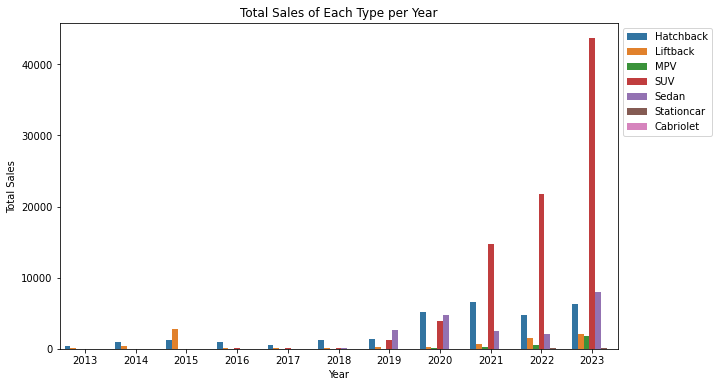

In [8]:
# Group the data by Year and Type and calculate the sum of Sales
grouped_data = data.groupby(['Year', 'Type'])['Sales'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', hue='Type', data=grouped_data)
plt.title('Total Sales of Each Type per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


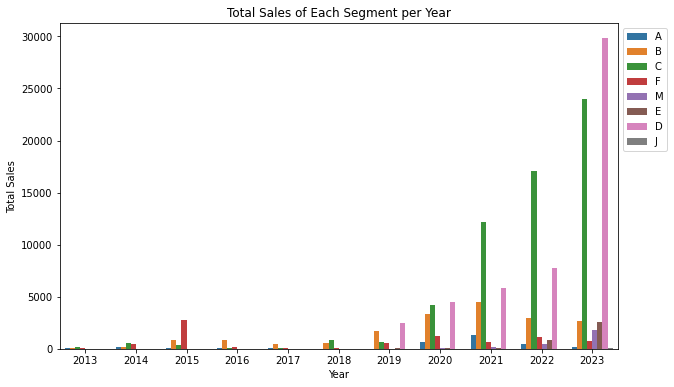

In [10]:
# Group the data by Year and Type and calculate the sum of Sales
grouped_data = data.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', hue='Segment', data=grouped_data)
plt.title('Total Sales of Each Segment per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
# Define a custom aggregation function
def regions(country):
    if country in ['DE', 'FR', 'DK', 'IT', 'RO', 'CZ', 'SP', 'SE']:
        return 'EU'
    elif country in ['JP', 'KR']:
        return 'Asia'
    elif country in ['CH']:
        return 'China'
    else:
        return country

# Apply the function to the 'Country' column
data['Region'] = data['Country'].apply(regions)

/var/folders/84/nl1t_q050914klynvps92vkc0000gn/T/ipykernel_61210/2134380466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Region'] = data['Country'].apply(regions)


In [ ]:
# Define the color of regions
color_region = {'China': 'red', 'US': 'black', 'Asia': 'green', 'GB': 'brown', 'EU': 'blue'}

# Define the color of countries
color_country = {'CH': 'red', 'US': 'black', 'DE': 'aqua', 'FR': 'blue', 'SP': 'orange', 'RO': 'purple', 'IT': 'green', 'DK': 'grey', 'JP': 'pink', 'KR': 'violet', 'GB': 'brown', 'SE': 'yellow', 'CZ': 'olive'}


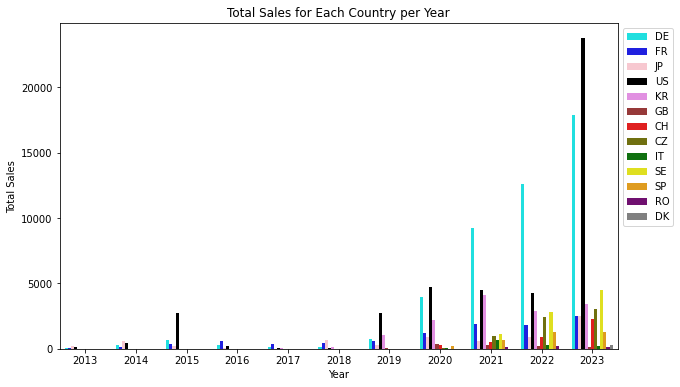

In [ ]:
# Group the data by Year and Country and calculate the sum of Sales
grouped_data = data.groupby(['Year', 'Country'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', hue='Country', data=grouped_data, palette=color_country)
plt.title('Total Sales for Each Country per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()




In [ ]:
# Sort the 'data' DataFrame by 'Year'
data_sorted = data.sort_values(by='Year')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get unique years
years = data_sorted['Year'].unique()

# Calculate the number of pie charts per line
num_charts_per_line = (len(years) + 1) // 2  # Round up to ensure half the charts are on each line

# Create subplots with two rows and the calculated number of columns
fig = make_subplots(rows=2, cols=num_charts_per_line, specs=[[{'type':'domain'}] * num_charts_per_line] * 2)


# Iterate over each year
for i, year in enumerate(years, start=1):
    # Calculate the row and column indices for the current chart
    row_index = (i - 1) // num_charts_per_line + 1  # Divide by the number of charts per line and round up
    col_index = (i - 1) % num_charts_per_line + 1
    
    # Filter data for the current year
    year_data = data_sorted[data_sorted['Year'] == year]
    
    # Group the data by region and sum up the sales
    sales_by_region = year_data.groupby('Region')['Sales'].sum().reset_index()
    
    # Add a pie chart trace for the current year
    pie_trace = go.Pie(
        labels=sales_by_region['Region'], 
        values=sales_by_region['Sales'], 
        scalegroup='one', 
        name=f"{year}",
        marker=dict(colors=[color_region[region] for region in sales_by_region['Region']]),
        textinfo='label+percent',
        hoverinfo='label+value+name'  # Include value of sales in the hover info
    )
    
    fig.add_trace(pie_trace, row=row_index, col=col_index)

# Update layout
fig.update_layout(title_text='Market share in the Danish EV market by year')

# Show the plot
fig.show()


# Save the interactive plots by following:

In [ ]:
# Save the plot as an HTML file
#fig.write_html("interactive_plot.html")

# Print the HTML code to embed into LaTeX
#print(f"<iframe src='interactive_plot.html' width='1200' height='800'></iframe>")

# TEST

In [ ]:
# Initialize empty lists to store subplot traces
fig1 = go.Figure()
fig2 = go.Figure()

# Filter data for the first half of the years (2013-2018)
first_half_data = data_sorted[data_sorted['Year'].between(2013, 2018)]

# Filter data for the second half of the years (2019-2023)
second_half_data = data_sorted[data_sorted['Year'].between(2019, 2023)]

# Iterate over each region
for region in data['Region'].unique():
    # Filter data for the current region in the first half of the years
    region_first_half_data = first_half_data[first_half_data['Region'] == region]
    
    # Grouping data by 'Year' and summing up the 'Sales' column
    year_sales_first_half = region_first_half_data.groupby('Year')['Sales'].sum().reset_index()

    # Extracting years and number of cars sold for the first half
    x1 = year_sales_first_half['Year'].tolist()
    y1 = year_sales_first_half['Sales'].tolist()

    # Find the top-selling car in each year for the first half
    top_models_first_half = region_first_half_data.loc[region_first_half_data.groupby('Year')['Sales'].idxmax()][['Year', 'Manufacturer', 'Model', 'Sales']]

    # Create text labels for the first half
    text_labels1 = [f"{row['Manufacturer']} {row['Model']} ({row['Sales']} cars)" for index, row in top_models_first_half.iterrows()]

    # Create a bar trace for the first half with specified color
    trace1 = go.Bar(
        x=x1, 
        y=y1,
        text=text_labels1,
        textposition='auto',
        name=region,
        hoverinfo='text',
        marker=dict(color=color_region[region])  # Assign color based on region
    )

    # Add the trace to the first figure
    fig1.add_trace(trace1)
    
    # Filter data for the current region in the second half of the years
    region_second_half_data = second_half_data[second_half_data['Region'] == region]
    
    # Grouping data by 'Year' and summing up the 'Sales' column for the second half
    year_sales_second_half = region_second_half_data.groupby('Year')['Sales'].sum().reset_index()

    # Extracting years and number of cars sold for the second half
    x2 = year_sales_second_half['Year'].tolist()
    y2 = year_sales_second_half['Sales'].tolist()

    # Find the top-selling car in each year for the second half
    top_models_second_half = region_second_half_data.loc[region_second_half_data.groupby('Year')['Sales'].idxmax()][['Year', 'Manufacturer', 'Model', 'Sales']]

    # Create text labels for the second half
    text_labels2 = [f"{row['Manufacturer']} {row['Model']} ({row['Sales']} cars)" for index, row in top_models_second_half.iterrows()]

    # Create a bar trace for the second half with specified color
    trace2 = go.Bar(
        x=x2, 
        y=y2,
        text=text_labels2,
        textposition='auto',
        name=region,
        hoverinfo='text',
        marker=dict(color=color_region[region])  # Assign color based on region
    )

    # Add the trace to the second figure
    fig2.add_trace(trace2)

# Update layout for the first figure
fig1.update_layout(
    title="Cars Sold by Year and Region (2013-2018)",
    xaxis_title="Year",
    yaxis_title="Number of Cars Sold",
    barmode='group',
    height=800,  # Adjust height as needed
    width=1200,  # Adjust width as needed
)

# Update layout for the second figure
fig2.update_layout(
    title="Cars Sold by Year and Region (2019-2023)",
    xaxis_title="Year",
    yaxis_title="Number of Cars Sold",
    barmode='group',
    height=800,  # Adjust height as needed
    width=1200,  # Adjust width as needed
)

# Show the plots
fig1.show()
fig2.show()

# SAVE TO LATEX
# Save the plot as an HTML file
#fig.write_html("interactive_plot.html")

# Print the HTML code to embed into LaTeX
#print(f"<iframe src='interactive_plot.html' width='1200' height='800'></iframe>")
